# Final Project - Word Cloud

For this project, you'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of your script, you will need to provide a file that contains text only.  For the text itself, you can copy and paste the contents of a website you like.  Or you can use a site like [Project Gutenberg](https://www.gutenberg.org/) to find books that are available online.  You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br><br>
Now you will need to upload your input file here so that your script will be able to process it.  To do the upload, you will need an uploader widget.  Run the following cell to perform all the installs and imports for your word cloud script and uploader widget.  It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing. Then you can continue on with the rest of the instructions for this notebook.
<br><br>
**Enabling notebook extension fileupload/extension...**
<br>
**- Validating: <font color =green>OK</font>**

In [1]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

  Using cached https://files.pythonhosted.org/packages/be/33/5bdd39587f0e8ede3fe12d9d16d6f1fb5e7a43f29621604a949ee362d013/wordcloud-1.8.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/10/5f/10c310c943f29e67976dcc26dccf9305a5a9bc7483e631ee74a0f95aa5b2/matplotlib-2.2.5.tar.gz
    Complete output from command python setup.py egg_info:
    Edit setup.cfg to change the build options
    
    BUILDING MATPLOTLIB
                matplotlib: yes [2.2.5]
                    python: yes [2.7.17 (default, Feb 27 2021, 15:10:58)  [GCC
                            7.5.0]]
                  platform: yes [linux2]
    
    REQUIRED DEPENDENCIES AND EXTENSIONS
                     numpy: yes [version 1.16.6]
          install_requires: yes [handled by setuptools]
                    libagg: yes [pkg-config information for 'libagg' could not
                            be found. Using local copy.]
                  freetype: no  [The C/C++ header for freetype2 (ft2build.h)
              

  Using cached https://files.pythonhosted.org/packages/7d/cd/1750d6c35fe86d35f8562091737907f234b78fdffab42b29c72b1dd861f4/backports.shutil_get_terminal_size-1.0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/be/39/32da3184734730c0e4d3fa3b2b5872104668ad6dc1b5a73d8e477e5fe967/Pygments-2.5.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9d/d2/2f099b5cd62dab819ce7a9f1431c09a9032fbfbb6474f442722e88935376/prompt_toolkit-1.0.18-py2-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3d/57/4d9c9e3ae9a255cd4e1106bb57e24056d3d0709fc01b2e3e345898e49d5b/simplegeneric-0.8.1.zip
  Using cached https://files.pythonhosted.org/packages/9a/41/220f49aaea88bc6fa6cba8d05ecf24676326156c23b991e80b3f2fc24c77/pickleshare-0.7.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/39/7b/88dbb785881c28a102619d46423cb853b46dbccc70d3ac362d99773a78ce/pexpect-4.8.0-py2.py3-none-any.whl
  Using cached https://files.pyth

Traceback (most recent call last):
  File "/usr/bin/jupyter-nbextension", line 11, in <module>
    load_entry_point('notebook==5.2.2', 'console_scripts', 'jupyter-nbextension')()
  File "/usr/lib/python3/dist-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/notebook/nbextensions.py", line 988, in start
    super(NBExtensionApp, self).start()
  File "/usr/lib/python3/dist-packages/jupyter_core/application.py", line 255, in start
    self.subapp.start()
  File "/usr/lib/python3/dist-packages/notebook/nbextensions.py", line 896, in start
    self.toggle_nbextension_python(self.extra_args[0])
  File "/usr/lib/python3/dist-packages/notebook/nbextensions.py", line 872, in toggle_nbextension_python
    logger=self.log)
  File "/usr/lib/python3/dist-p

ModuleNotFoundError: No module named 'wordcloud'

Whew! That was a lot. All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [2]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

NameError: name 'fileupload' is not defined

The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. This was a lot of preliminary work, but you are now ready to begin your script. 

Write a function in the cell below that iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  Oh, and be sure to make it ignore word case, words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate your very own word cloud!
<br><br>
**Hint:** Try storing the results of your iteration in a dictionary before passing them into wordcloud via the `generate_from_frequencies` function.

In [4]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my",     "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them",     "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being",     "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how",     "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    d = {}
    f = file_contents.split()
    for word in f:
        if word not in uninteresting_words :
            for letter in word:
                if letter in punctuations:
                    letter.replace(punctuations,"")
            if word not in d.keys():
                d[word] = 0
            else :
                d[word]+=1
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(d)
    return cloud.to_array()


If you have done everything correctly, your word cloud image should appear after running the cell below.  Fingers crossed!

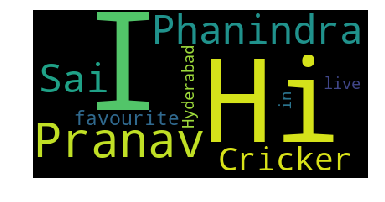

In [5]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

If your word cloud image did not appear, go back and rework your `calculate_frequencies` function until you get the desired output.  Definitely check that you passed your frequecy count dictionary into the `generate_from_frequencies` function of `wordcloud`. Once you have correctly displayed your word cloud image, you are all done with this project. Nice work!